<a href="https://colab.research.google.com/github/Oyeniran20/Machine-Learning/blob/main/Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fake News Detection**

### **Data Loading and Exploration**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/train.csv')
df.head()

,text,label
0,dark agenda behind globalism open border altma...,0
1,america poor still get shaft sami jamil jadall...,0
2,number accuser grow former miss finland accuse...,0
3,heroic prego advertisement replaces refresh we...,0
4,russia syria debbie reynolds thursday even bri...,1


In [3]:
df.shape

(52741, 2)

In [4]:
df.isna().sum()

,0
text,0
label,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52741 entries, 0 to 52740
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    52741 non-null  object
 1   label   52741 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 824.2+ KB


In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52741 entries, 0 to 52740
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    52741 non-null  object
 1   label   52741 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 824.2+ KB


In [8]:
df['label'].value_counts()

,count
label,
0,26484
1,26257


### **Text Processing**

In [9]:
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [10]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# Initialize stopwords and lemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [12]:
# Preprocessing function

def preprocess_text(text):
  text = re.sub('[^a-zA-Z0-9]', ' ', text)
  text = text.lower()
  words = text.split()
  words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
  words = ' '.join(words)
  return words

In [13]:
# Apply preprocessing

df['text'] = df['text'].apply(preprocess_text)

In [14]:
print(df['text'])

0        dark agenda behind globalism open border altma...
1        america poor still get shaft sami jamil jadall...
2        number accuser grow former miss finland accuse...
3        heroic prego advertisement replaces refresh we...
4        russia syria debbie reynolds thursday even bri...
                               ...                        
52736    movie studio join disneyled service link digit...
52737    gordon strachan scotland problem strachan scot...
52738    athenia wreck first british ship torpedo ww ca...
52739    rugby league world cup kear name uncapped trio...
52740    brazilian lead u million mattress plead guilty...
Name: text, Length: 52741, dtype: object


### **Word Cloud Visualization**

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [16]:
# combine all text
text = ' '.join(df['text'])

In [17]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)

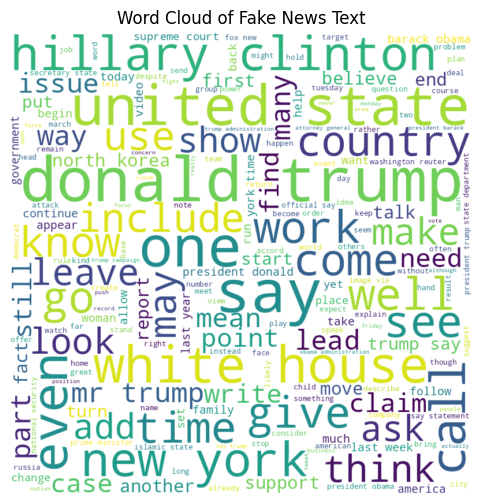

In [18]:
# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Fake News Text')
plt.show()

### **Feature Extraction**

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])

y = df['label']

In [20]:
# Extract Sparse Matrix Information
matrix_shape = X.shape
non_zero_count = X.nnz  # Number of non-zero elements
total_elements = matrix_shape[0] * matrix_shape[1]
sparsity_percentage = (1 - (non_zero_count / total_elements)) * 100

# Display Sparse Matrix Information
print("=== Sparse Matrix Information (TD-IDF) ===")
print("Matrix Shape:", matrix_shape)
print("Non-Zero Elements:", non_zero_count)
print("Total Elements:", total_elements)
print("Sparsity Percentage:", sparsity_percentage, "%")


=== Sparse Matrix Information (TD-IDF) ===
Matrix Shape: (52741, 226168)
Non-Zero Elements: 8627170
Total Elements: 11928326488
Sparsity Percentage: 99.9276749340431 %


### **Train - Test Split**

In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### **Model Training**

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
# Models
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()

In [24]:
# Train the models
logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier()

In [25]:
# Predict the models
logistic_train_pred = logistic_regression.predict(X_train)
logistic_test_pred = logistic_regression.predict(X_test)

random_forest_train_pred = random_forest.predict(X_train)
random_forest_test_pred = random_forest.predict(X_test)

gradient_boosting_train_pred = gradient_boosting.predict(X_train)
gradient_boosting_test_pred = gradient_boosting.predict(X_test)

In [27]:
# Accuracy
acc_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Train Accuracy': [accuracy_score(y_train, logistic_train_pred),
                       accuracy_score(y_train, random_forest_train_pred),
                       accuracy_score(y_train, gradient_boosting_train_pred)],
    'Test Accuracy': [accuracy_score(y_test, logistic_test_pred),
                      accuracy_score(y_test, random_forest_test_pred),
                      accuracy_score(y_test, gradient_boosting_test_pred)]
}

In [29]:
acc_df = pd.DataFrame(acc_data)
acc_df

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.959874,0.941606
1,Random Forest,1.000000,0.927481
2,Gradient Boosting,0.939609,0.933453


In [30]:
# confusion matrix

models = {
    'Logistic Regression': logistic_regression,
    'Random Forest': random_forest,
    'Gradient Boosting': gradient_boosting
}

In [32]:
import seaborn as sns

========= Logistic Regression =========


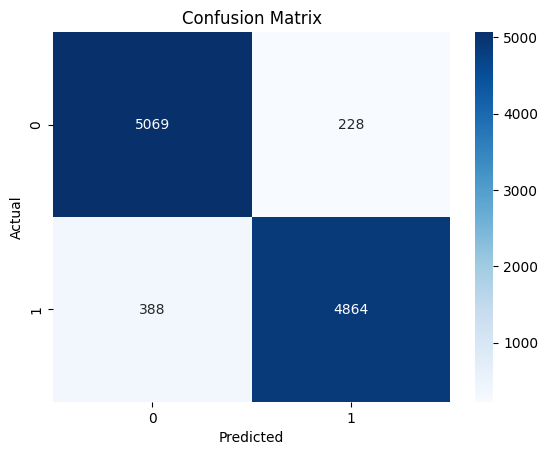

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      5297
           1       0.96      0.93      0.94      5252

    accuracy                           0.94     10549
   macro avg       0.94      0.94      0.94     10549
weighted avg       0.94      0.94      0.94     10549



========= Random Forest =========


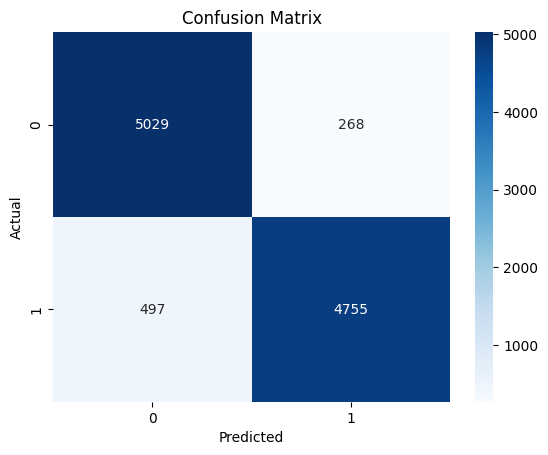

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      5297
           1       0.95      0.91      0.93      5252

    accuracy                           0.93     10549
   macro avg       0.93      0.93      0.93     10549
weighted avg       0.93      0.93      0.93     10549



========= Gradient Boosting =========


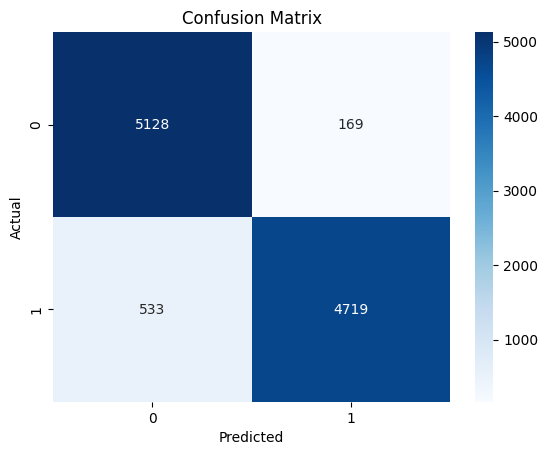

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5297
           1       0.97      0.90      0.93      5252

    accuracy                           0.93     10549
   macro avg       0.94      0.93      0.93     10549
weighted avg       0.94      0.93      0.93     10549





In [35]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'========= {model_name} =========')

    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    print('\n')

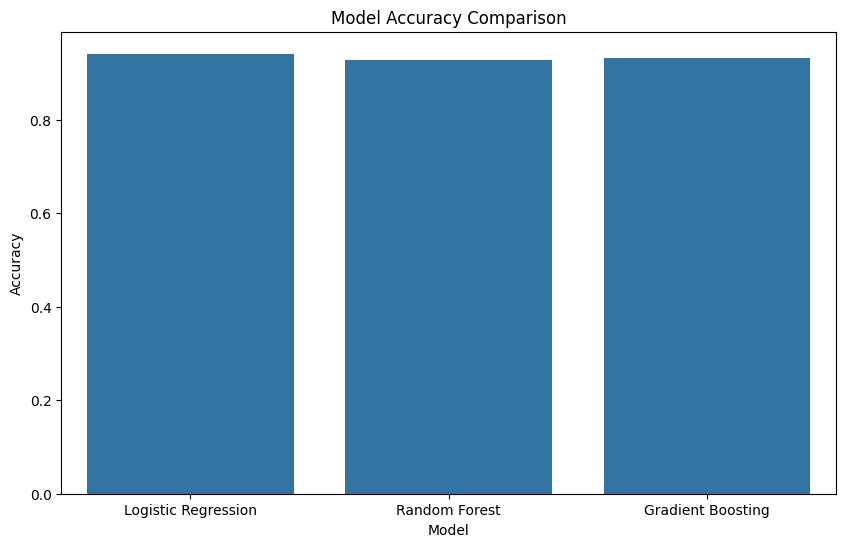

In [36]:
# Accuracy comparism
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Accuracy', data=acc_df)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

In [24]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
    #'Support Vector Machine': SVC(),
    #'Naive Bayes': MultinomialNB()
}

# Train and evaluate each models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

# Print the results
for model_name, accuracy in results.items():
    print(f'{model_name}: Accuracy = {accuracy:.4f}')


KeyboardInterrupt: 

In [ ]:
X = df['text'].values
y = df['label'].values

In [ ]:
y

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

In [ ]:
X = vectorizer.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()

In [32]:
model2 = RandomForestClassifier()

In [39]:
model3 = GradientBoostingClassifier()

In [40]:
model3.fit(X_train, y_train)

GradientBoostingClassifier()

In [41]:
# Evaluate the model
train_pred =  model3.predict(X_train)
test_pred = model3.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

In [44]:
train_acc, test_acc

(0.9441837315130831, 0.9367712579391412)

In [46]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, test_pred)
cm

array([[5114,  183],
       [ 484, 4768]])

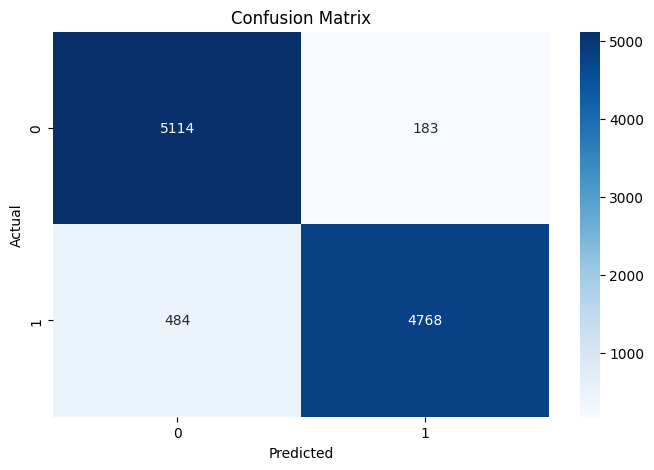

In [48]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

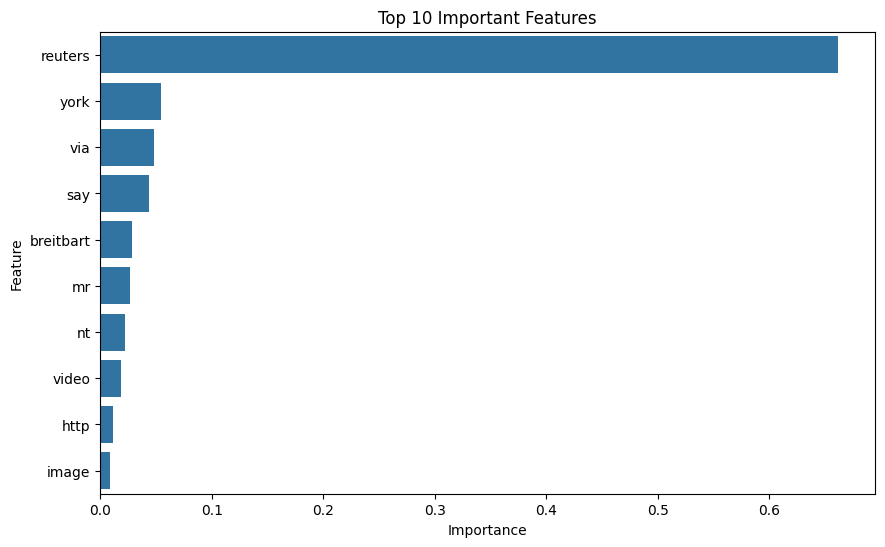

In [49]:
# Feature importance
feature_importance = model3.feature_importances_
feature_names = vectorizer.get_feature_names_out()
top_indices = np.argsort(feature_importance)[-10:]
top_feature_names = [feature_names[i] for i in top_indices]
top_importance = feature_importance[top_indices]


#plot top features
top_features_df = pd.DataFrame(top_importance, columns=['Importance'])
top_features_df['Feature'] = top_feature_names
top_features_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features')
plt.show()